<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Filter_methods_chi_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
selector = SelectKBest(score_func=chi2, k=2)
selector.fit(X_scaled, y)
df_chi2 = pd.DataFrame({
    'feature': X.columns,
    'chi2_score': selector.scores_
}).sort_values('chi2_score', ascending=False)
print("\nChi-Square scores:\n", df_chi2)
print("Top 2 features:", list(df_chi2['feature'][:2]))


Chi-Square scores:
              feature  chi2_score
3   petal width (cm)   30.478068
2  petal length (cm)   26.861936
0  sepal length (cm)   11.377274
1   sepal width (cm)    4.470734
Top 2 features: ['petal width (cm)', 'petal length (cm)']


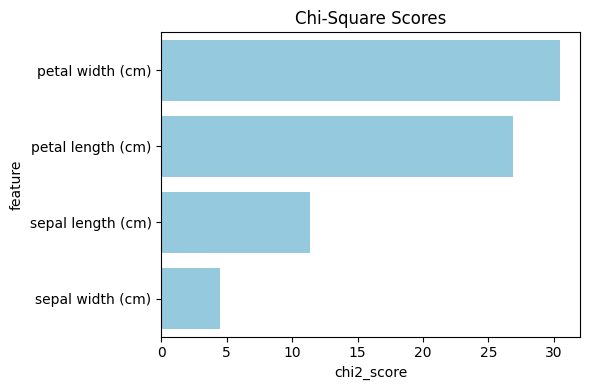

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='chi2_score', y='feature', data=df_chi2, color='skyblue')
plt.title('Chi-Square Scores')
plt.tight_layout()
plt.show()


In [ ]:
print("\n=== Top-k Feature Selection Stability (k=1 to 4) ===")
stability = {}
for k in range(1, 5):
    selector = SelectKBest(score_func=chi2, k=k).fit(X_scaled, y)
    top_features = list(X.columns[selector.get_support()])
    stability[k] = top_features
    print(f"Top {k} features: {top_features}")


=== Top-k Feature Selection Stability (k=1 to 4) ===
Top 1 features: ['petal width (cm)']
Top 2 features: ['petal length (cm)', 'petal width (cm)']
Top 3 features: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
Top 4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


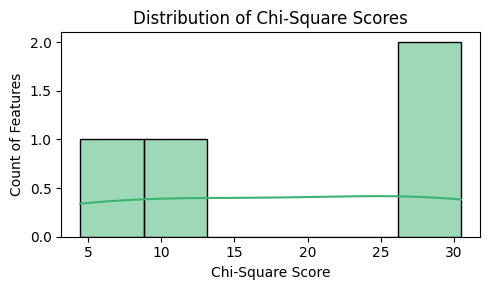

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(df_chi2['chi2_score'], bins=6, kde=True, color='mediumseagreen')
plt.title('Distribution of Chi-Square Scores')
plt.xlabel('Chi-Square Score')
plt.ylabel('Count of Features')
plt.tight_layout()
plt.show()

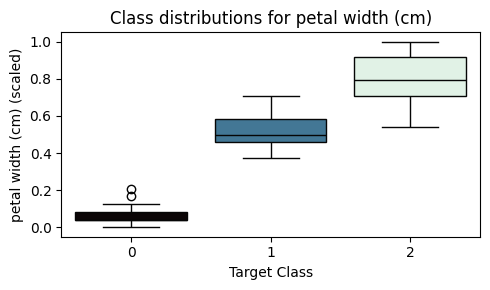

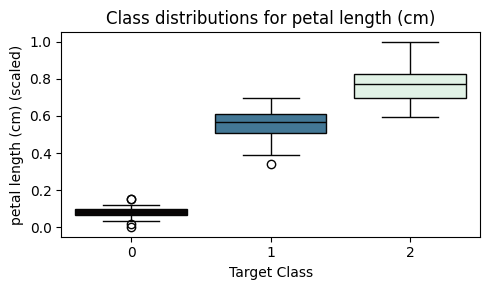

In [ ]:
top_features = df_chi2['feature'].head(2).tolist()
for feat in top_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=y, y=X_scaled[feat], hue=y, palette='mako', legend=False)
    plt.title(f"Class distributions for {feat}")
    plt.xlabel('Target Class')
    plt.ylabel(f"{feat} (scaled)")
    plt.tight_layout()
    plt.show()

In [ ]:
for feat in top_features:
    binned = pd.cut(X_scaled[feat], bins=4, labels=[1, 2, 3, 4])
    ct = pd.crosstab(binned, y, normalize='index')
    print(f"\nCrosstab of {feat} bins vs. class:\n", ct)



Crosstab of petal width (cm) bins vs. class:
 target              0      1      2
petal width (cm)                   
1                 1.0  0.000  0.000
2                 0.0  1.000  0.000
3                 0.0  0.625  0.375
4                 0.0  0.000  1.000

Crosstab of petal length (cm) bins vs. class:
 target               0         1         2
petal length (cm)                         
1                  1.0  0.000000  0.000000
2                  0.0  1.000000  0.000000
3                  0.0  0.639344  0.360656
4                  0.0  0.000000  1.000000


In [ ]:
mi_scores = mutual_info_classif(X, y, random_state=42)
df_mi = pd.DataFrame({
    'feature': X.columns,
    'MI_score': mi_scores
}).sort_values('MI_score', ascending=False)

In [ ]:
df_compare = df_chi2.merge(df_mi, on='feature')
print("\nChi-Square vs. MI Scores:\n", df_compare.round(3))
corr_coef = df_compare['chi2_score'].corr(df_compare['MI_score'])
print(f"Correlation between chi-square and MI: {corr_coef:.3f}")



Chi-Square vs. MI Scores:
              feature  chi2_score  MI_score
0   petal width (cm)      30.478     0.986
1  petal length (cm)      26.862     0.993
2  sepal length (cm)      11.377     0.511
3   sepal width (cm)       4.471     0.299
Correlation between chi-square and MI: 0.992


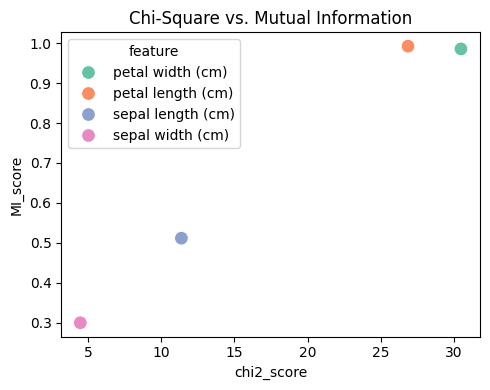

In [ ]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df_compare, x='chi2_score', y='MI_score', hue='feature', s=100, palette='Set2')
plt.title("Chi-Square vs. Mutual Information")
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-3711463402.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


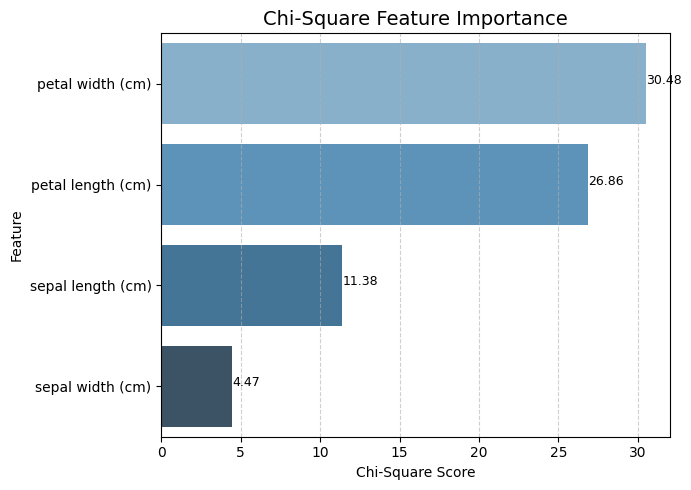

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by chi2 score (descending)
df_chi2_sorted = df_chi2.sort_values(by='chi2_score', ascending=False)

plt.figure(figsize=(7, 5))  # slightly larger for better spacing

# Plot barplot
ax = sns.barplot(
    x='chi2_score',
    y='feature',
    data=df_chi2_sorted,
    palette='Blues_d'
)

# Add value labels on bars
for i in ax.patches:
    ax.text(i.get_width() + 0.02, i.get_y() + 0.4,
            f"{i.get_width():.2f}", fontsize=9)

plt.title('Chi-Square Feature Importance', fontsize=14)
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # subtle gridlines
plt.tight_layout()
plt.show()


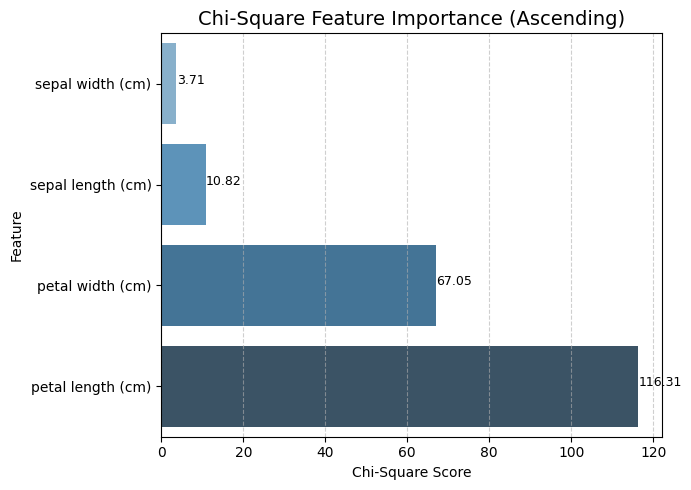

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

# Load Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Chi-Square feature selection
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_

# Create DataFrame of feature scores
df_chi2 = pd.DataFrame({
    'feature': X.columns,
    'chi2_score': chi2_scores
})

# Sort in ascending order
df_chi2_sorted = df_chi2.sort_values(by='chi2_score', ascending=True)

# Plot without FutureWarning
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    x='chi2_score',
    y='feature',
    hue='feature',                # fix for future version
    data=df_chi2_sorted,
    palette='Blues_d',
    legend=False                  # no duplicate legend since y-labels suffice
)

# Show numeric score on each bar
for bar in ax.patches:
    ax.text(bar.get_width() + 0.1, bar.get_y() + 0.4,
            f"{bar.get_width():.2f}", fontsize=9)

plt.title('Chi-Square Feature Importance (Ascending)', fontsize=14)
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
